In [1]:
import pickle
import numpy as np

with open('../outputs/results/aug_tvae_hard.pkl', 'rb') as f:
    aug_tvae_hard = np.array(pickle.load(f))
with open('../outputs/results/aug_tvae_tot.pkl', 'rb') as f:
    aug_tvae_tot = np.array(pickle.load(f))
with open('../outputs/results/aug_ctgan_hard.pkl', 'rb') as f:
    aug_ctgan_hard = np.array(pickle.load(f))
with open('../outputs/results/aug_ctgan_tot.pkl', 'rb') as f:
    aug_ctgan_tot = np.array(pickle.load(f))

In [2]:
import numpy as np

means_tvae_hard, stds_tvae_hard = aug_tvae_hard.mean(axis=1), 1.96 * aug_tvae_hard.std(axis=1) / np.sqrt(10)
means_tvae_tot, stds_tvae_tot = aug_tvae_tot.mean(axis=1), 1.96 * aug_tvae_tot.std(axis=1) / np.sqrt(10)
means_ctgan_hard, stds_ctgan_hard = aug_ctgan_hard.mean(axis=1), 1.96 * aug_ctgan_hard.std(axis=1) / np.sqrt(10)
means_ctgan_tot, stds_ctgan_tot = aug_ctgan_tot.mean(axis=1), 1.96 * aug_ctgan_tot.std(axis=1) / np.sqrt(10)

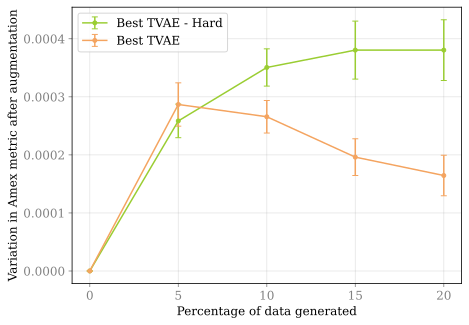

In [3]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.rc('font', family='serif')
plt.rc('axes', grid=True)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.2)
plt.rc('ytick', direction='out', color='gray')
plt.rc('xtick', direction='out', color='gray')
plt.rcParams.update({'font.size': 12})

perc_aug = [0, 5, 10, 15, 20]
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(perc_aug, [0] + list(means_tvae_hard), yerr=[0] + list(stds_tvae_hard), fmt='-o', capsize=3, markersize=4, alpha=1., label='Best TVAE - Hard',
            color='yellowgreen', ecolor='yellowgreen')
ax.errorbar(perc_aug, [0] + list(means_tvae_tot), yerr=[0] + list(stds_tvae_tot), fmt='-o', capsize=3, markersize=4, alpha=1., label='Best TVAE',
            color='sandybrown', ecolor='sandybrown')
ax.set_xticks(perc_aug)
#ax.set_ylim((0, 0.00045))
ax.set_xlabel('Percentage of data generated')
ax.set_ylabel('Variation in Gini after augmentation')
ax.legend()
fig.savefig('../outputs/figures/tvae_vs_tvae_hard.pdf', dpi=300, bbox_inches='tight')

In [4]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))

from tqdm import tqdm

X_train = np.load('../data/processed/train.npz')['x']
y_train = np.load('../data/processed/train.npz')['y']
X_v = np.load('../data/processed/v.npz')['x']
y_v = np.load('../data/processed/v.npz')['y']
X_test = np.load('../data/processed/test.npz')['x']
y_test = np.load('../data/processed/test.npz')['y']

import json
import xgboost as xgb

from src.utils.amex_metric import *
from src.utils.train_xgb import *

# 50000 test points used only to compute KNN Shapleys
# How much does validation Gini improve if we add them back?
X_train_tot = np.vstack((X_train, X_test))
y_train_tot = np.concatenate((y_train, y_test))

score, _ = train_xgb(X_train_tot, y_train_tot, X_v, y_v, n=10)
score_tot, _ = train_xgb(X_train, y_train, X_v, y_v, n=10)
print(score - score_tot)